Table of Content

1. Import required libraries
2. Load data
3. Check Data information
4. Check null values
5. Data cleaning
6. changing datatypes
7. Drop columns
8. EDA
    1. Univariant Analysis
    2. Target variable relationship with other variables
    3. Bivariant Analysis
    4. Multivariant Analysis
    5. Correlation Map
9. Encode categorical features
10. Split data into train and test
11. Build baseline models
    1. Logistic Regression
    2. Ada Boos tClassifier
    3. Random Forest Classifier
    4. Stacking Classifier
    5. K Neighbors Classifier
12. Balance the data
    1. Logistic Regression
    2. Ada Boos tClassifier
    3. Random Forest Classifier
    4. Stacking Classifier
    5. K Neighbors Classifier
13. Hyper parameter tuning
14. Create Submission file
15. Best Model

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

# Load Data

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
sub = pd.read_csv('sample_submission_49d68Cx.csv')
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


# Drop loan id column

In [13]:
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

# Check Data information

In [14]:
print('Train Data contains', train.shape[0], 'rows and', train.shape[1], 'columns')

Train Data contains 614 rows and 12 columns


In [15]:
print('Test Data contains', test.shape[0], 'rows and', test.shape[1], 'columns')

Test Data contains 367 rows and 11 columns


In [16]:
train.duplicated().sum()

0

In [7]:
# Check information about features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


# Data Cleaning

In [83]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Fill null values

In [4]:
def fill_na(frame):
    for i in frame.columns:
        if(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'int64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'O'):
            frame[i] = frame[i].fillna(frame[i].mode()[0])
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'float64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
fill_na(train)
fill_na(test)

# Changing Datatypes

In [5]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')
train['Credit_History'] = train['Credit_History'].astype('O')
test['Credit_History'] = test['Credit_History'].astype('O')

# EDA

# Univariant Analysis

Gender


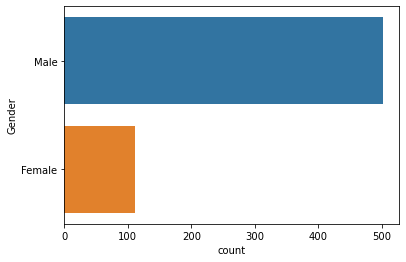

Married


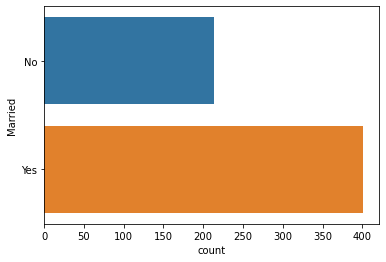

Dependents


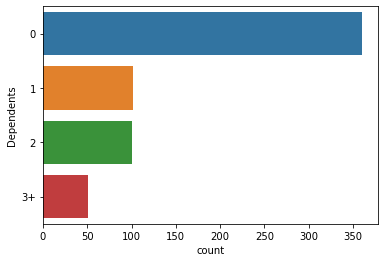

Education


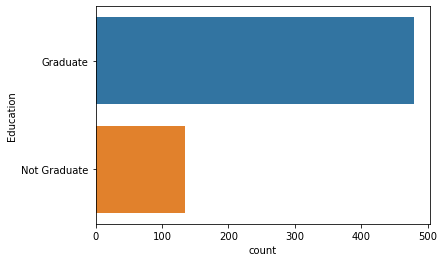

Self_Employed


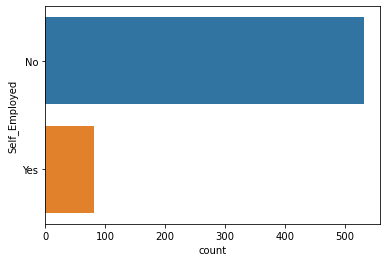

Credit_History


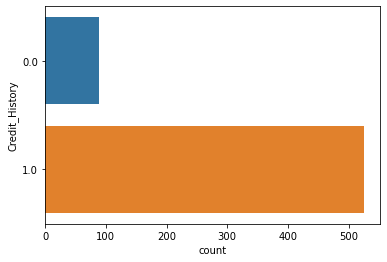

Property_Area


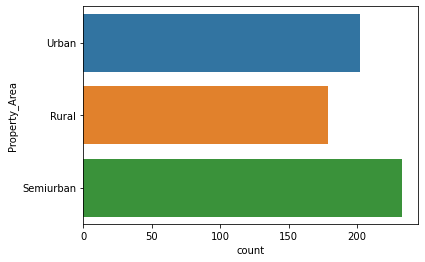

Loan_Status


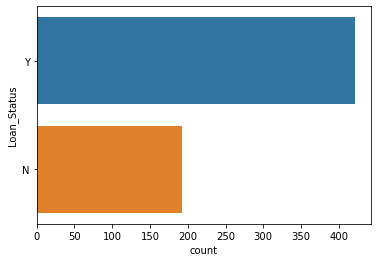

In [8]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'O'):
            print(i)
            sns.countplot(y=frame[i])
            plt.show()
            
univariant(train)

# BiVariant Analysis

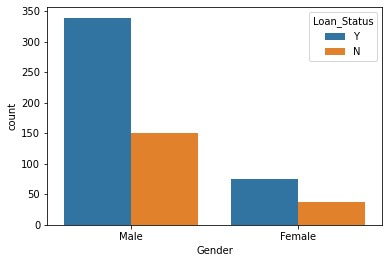

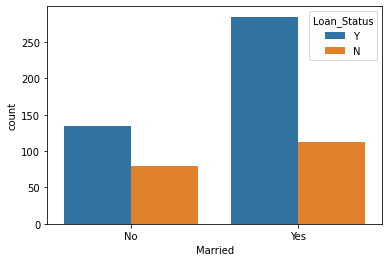

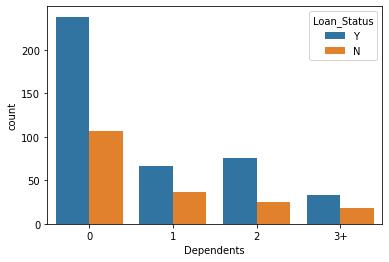

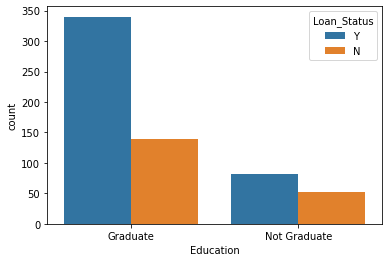

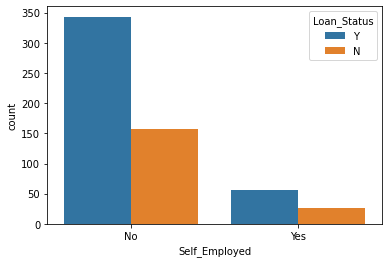

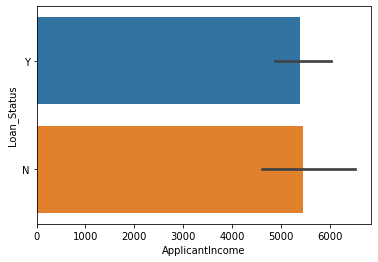

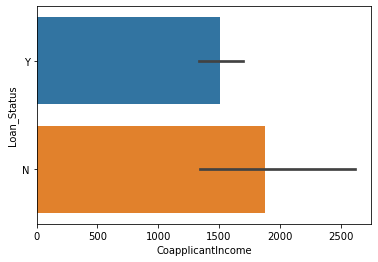

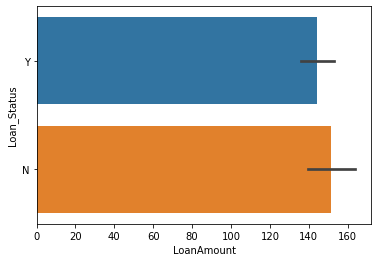

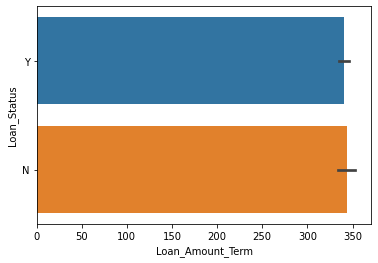

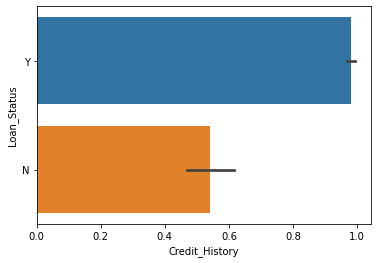

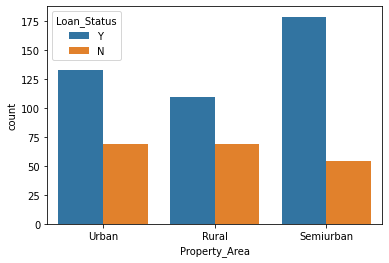

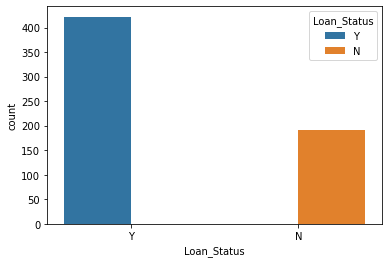

In [17]:
def target(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.barplot(y=train['Loan_Status'], x=frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.barplot(y=train['Loan_Status'], x=frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            sns.countplot(hue=train['Loan_Status'], x=frame[i])
            plt.show()
            
target(train)

# Check Relation with Target variable

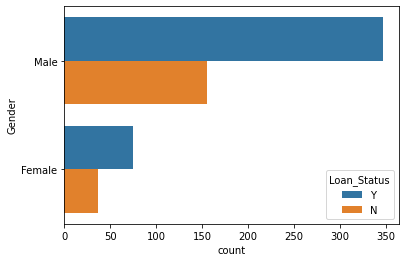

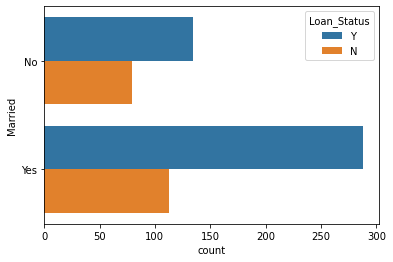

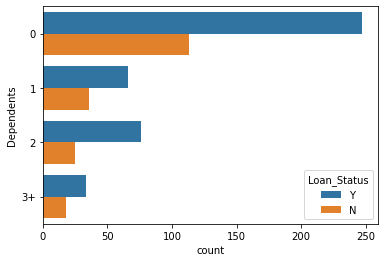

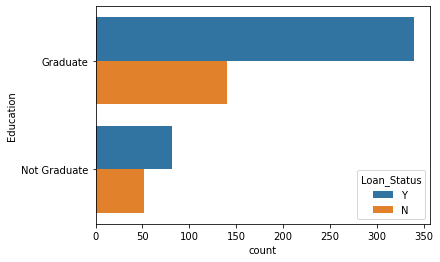

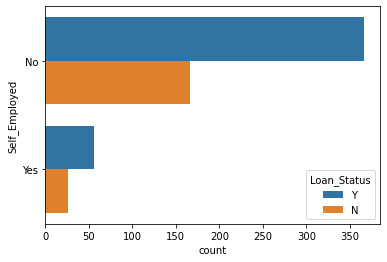

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


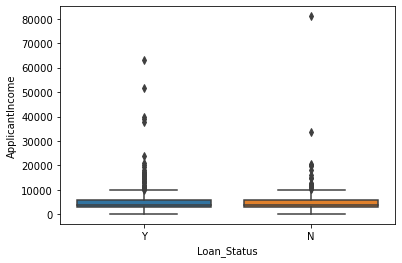

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


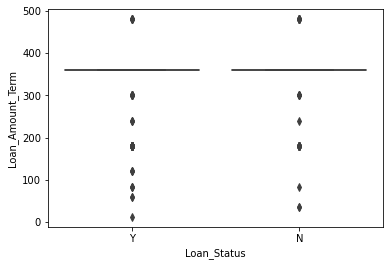

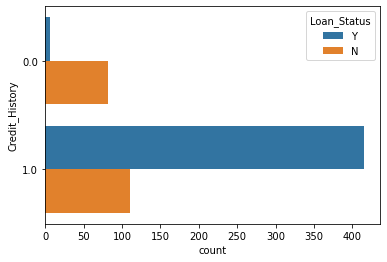

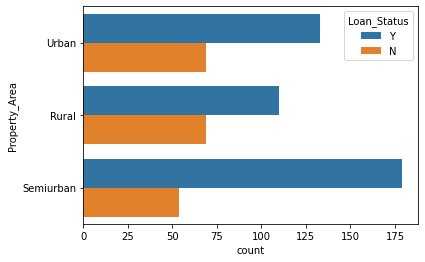

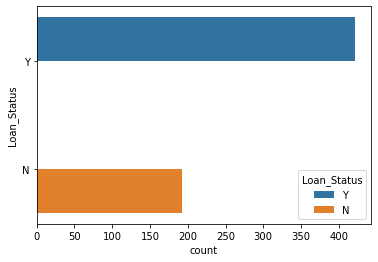

In [11]:
def target(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(train['Loan_Status'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            sns.countplot(hue = train['Loan_Status'], y = frame[i])
            plt.show()
            
target(train)

# MultiVariant Analysis

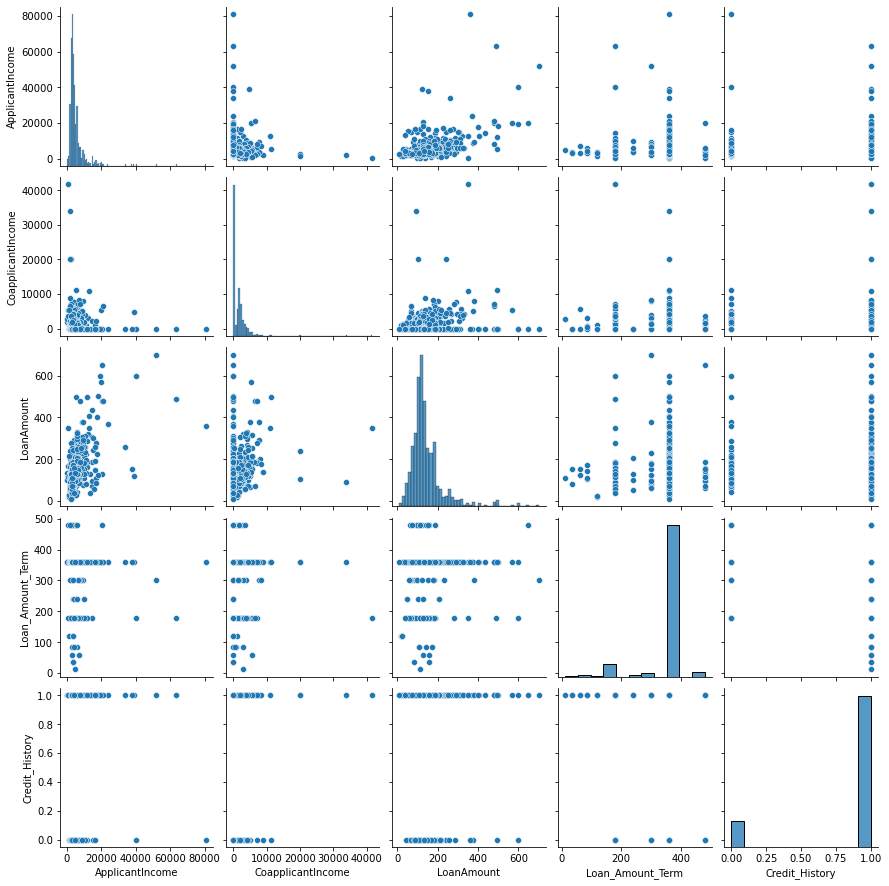

In [12]:
sns.pairplot(train)

# Correlation Map

<AxesSubplot:>

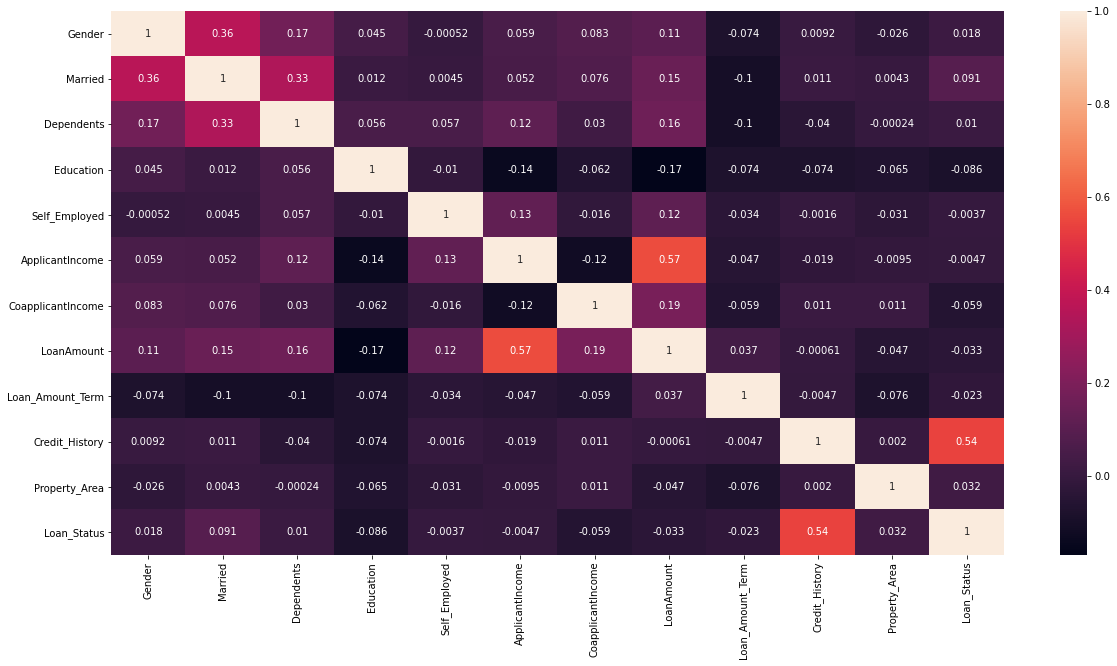

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

# Encode Categorical Features

In [7]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(train)
encode(test)

In [8]:
sc = StandardScaler()
sc.fit_transform(train)

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
        -1.31851281, -1.48253724],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.41173269,
         1.22329839,  0.67451931],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
         1.22329839,  0.67451931],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.41173269,
         1.22329839,  0.67451931],
       [-2.11710719, -1.37208932, -0.73780632, ..., -2.42876026,
        -0.04760721, -1.48253724]])

# Split Data into train and test

In [52]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Let's Build Baseline Models

# Logistic Regression

In [54]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [55]:
lr_pred = lr.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185



In [56]:
accuracy_score(Y_test, lr_pred)

0.7891891891891892

# Ada Boost Classifier

In [31]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [32]:
ada_pred = ada.predict(X_test)
print(classification_report(Y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        61
           1       0.77      0.93      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



# Random Forest Classifier

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        61
           1       0.77      0.93      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



# XGBoost Classifier

In [37]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='ginni',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, max_features='sqrt',
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train, Y_train)

[17:39:47] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='ginni',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, max_features='sqrt',
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        61
           1       0.76      0.94      0.84       124

    accuracy                           0.77       185
   macro avg       0.77      0.68      0.69       185
weighted avg       0.77      0.77      0.74       185



# KNN

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25        61
           1       0.68      0.86      0.76       124

    accuracy                           0.64       185
   macro avg       0.54      0.52      0.50       185
weighted avg       0.59      0.64      0.59       185



# Stacking Classifier

In [41]:
estimators = [
    ('lr' , LogisticRegression(max_iter = 1000)),
    ('xgb', XGBClassifier()),
    ('rf' , RandomForestClassifier()),
    ('ada' , AdaBoostClassifier())
]

stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constra

In [42]:
stack_pred = stack.predict(X_test)
print(classification_report(Y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.84      0.44      0.58        61
           1       0.78      0.96      0.86       124

    accuracy                           0.79       185
   macro avg       0.81      0.70      0.72       185
weighted avg       0.80      0.79      0.77       185



In [43]:
accuracy_score(Y_test, stack_pred)

0.7891891891891892

# Balance the data and train again all models

# SMOTETomek

In [11]:
smote = SMOTETomek()
x_train, y_train = smote.fit_resample(X_train, Y_train)

# 1. Logistic Regression

In [15]:
slr = LogisticRegression(max_iter=1000)
slr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
slr_pred = slr.predict(X_test)
print(classification_report(Y_test, slr_pred))

              precision    recall  f1-score   support

           0       0.78      0.48      0.59        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.78      0.77       185



# 2. XGBoost Classification

In [17]:
sxgb = XGBClassifier()
sxgb.fit(x_train, y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
sxgb_pred = sxgb.predict(X_test)
print(classification_report(Y_test, sxgb_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61        61
           1       0.80      0.85      0.83       124

    accuracy                           0.76       185
   macro avg       0.73      0.71      0.72       185
weighted avg       0.76      0.76      0.76       185



# 3. Random Forest Classifier

In [19]:
srf = RandomForestClassifier()
srf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
srf_pred = srf.predict(X_test)
print(classification_report(Y_test, srf_pred))

              precision    recall  f1-score   support

           0       0.72      0.51      0.60        61
           1       0.79      0.90      0.84       124

    accuracy                           0.77       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.77      0.77      0.76       185



# 4. Ada Boost Classifier

In [22]:
sada = AdaBoostClassifier()
sada.fit(x_train, y_train)

AdaBoostClassifier()

In [23]:
sada_pred = sada.predict(X_test)
print(classification_report(Y_test, sada_pred))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        61
           1       0.80      0.89      0.84       124

    accuracy                           0.77       185
   macro avg       0.75      0.71      0.73       185
weighted avg       0.77      0.77      0.76       185



# 5. KNN

In [24]:
sknn = KNeighborsClassifier()
sknn.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
sknn_pred = sknn.predict(X_test)
print(classification_report(Y_test, sknn_pred))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36        61
           1       0.68      0.65      0.66       124

    accuracy                           0.56       185
   macro avg       0.51      0.51      0.51       185
weighted avg       0.57      0.56      0.56       185



# 6. Stacking Classifier 

In [65]:
estimator = [
    ('lr' , LogisticRegression(max_iter = 1000)),
    ('xgb', XGBClassifier()),
    ('rf' , RandomForestClassifier()),
    ('ada' , AdaBoostClassifier())
]

sstack = StackingClassifier(estimators=estimator)
sstack.fit(x_train, y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constra

In [66]:
sstack_pred = sstack.predict(X_test)
print(classification_report(Y_test, sstack_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.64        61
           1       0.81      0.91      0.86       124

    accuracy                           0.79       185
   macro avg       0.78      0.73      0.75       185
weighted avg       0.79      0.79      0.79       185



In [67]:
accuracy_score(Y_test, sstack_pred)

0.7945945945945946

Stacking Classifier performs better after balancing data. So i futher you this model for impementation

# Hyper parameter tuning
I am tuning Random Forest Classifer and use it in stacking Classifier

In [58]:
grid = {
    'n_estimators' : [200, 400, 600, 800, 1000],
    'criterion' : ['ginni', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}
random_cv = RandomizedSearchCV(rf,
                              grid,
                              cv=5,
                              n_iter=50,
                              n_jobs=-1,
                              scoring='accuracy',
                              random_state=1,
                              verbose=7)
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['ginni', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=7)

In [59]:
random_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)

In [70]:
hestimator = [
    ('lr' , LogisticRegression(max_iter = 1000)),
    ('xgb', XGBClassifier()),
    ('rf' , RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)),
    ('ada' , AdaBoostClassifier())
]

hstack = StackingClassifier(estimators=hestimator)
hstack.fit(x_train, y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constra

In [71]:
hstack_pred = hstack.predict(X_test)
print(classification_report(Y_test, hstack_pred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63        61
           1       0.80      0.90      0.85       124

    accuracy                           0.78       185
   macro avg       0.76      0.73      0.74       185
weighted avg       0.78      0.78      0.78       185



After hypere parameter tuning model not gives best score

# Submission File

In [138]:
test['Loan_Status2'] = sstack.predict(test)

In [ ]:
listt = list(test['Loan_Status2'])
convertt = []
for c in listt:
    if(c == 1):
        convertt.append('Y')
    else:
        convertt.append('N')
test['Loan_Status'] = convertt

In [ ]:
test = test.drop('Loan_Status2', axis=1)

In [140]:
submit = pd.DataFrame({
    'Loan_ID' : sub['Loan_ID'],
    'Loan_Status' : test['Loan_Status']
})
submit.to_csv('Submition.csv', index=False)

In [134]:
test = test.drop('Loan_Status', axis=1)

# Best model

My best model is Stacking Classifier after balancing daata